# **Analyzing Life Expectancy Trends Across Countries**

## **Objectives:**
- Understand factors affecting life expectancy.


- Compare life expectancy between genders.


- Identify patterns among countries with high and low life expectancy.


- Visualize trends and correlations.

## **1. Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **2. Load the Dataset**


In [3]:
df = pd.read_csv("life_expectancy.csv")

## **3. Rename Columns**

In [4]:
df.rename(columns={
    'Sum of Females  Life Expectancy': 'Female Life Expectancy',
    'Sum of Males  Life Expectancy': 'Male Life Expectancy',
    'Sum of Life Expectancy  (both sexes)': 'Overall Life Expectancy'
}, inplace=True)

## **4. Handle Missing Values**

In [5]:
df = df.dropna()  # Removes rows with missing values

## **5. Display Basic Statistics**


In [6]:
print(df.describe())  # Shows summary statistics

       Female Life Expectancy  Overall Life Expectancy  Male Life Expectancy
count              200.000000               200.000000            200.000000
mean                76.776900                74.133700             71.517200
std                  8.820332                 8.571318              8.419633
min                 54.940000                54.640000             53.360000
25%                 71.300000                68.732500             66.270000
50%                 77.955000                74.700000             71.250000
75%                 81.985000                79.062500             76.565000
max                149.220000               143.280000            137.640000


## **6. Visualizing Life Expectancy Trends**

### **A) Histogram of Overall Life Expectancy**

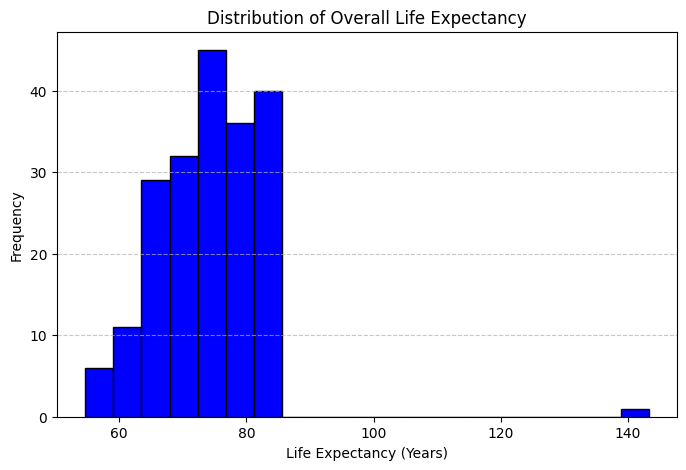

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(df["Overall Life Expectancy"], bins=20, color="blue", edgecolor="black")
plt.title("Distribution of Overall Life Expectancy")
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **B) Boxplot: Male vs Female Life Expectancy**

/var/folders/nn/36hj37750rlfkcx_tmgvxv_80000gp/T/ipykernel_66243/2239254923.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["Male Life Expectancy"], df["Female Life Expectancy"]],


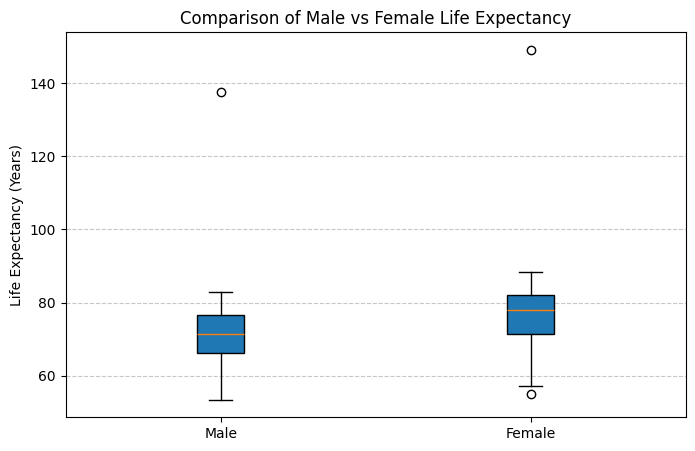

In [8]:
plt.figure(figsize=(8, 5))
plt.boxplot([df["Male Life Expectancy"], df["Female Life Expectancy"]],
            labels=["Male", "Female"], patch_artist=True)
plt.title("Comparison of Male vs Female Life Expectancy")
plt.ylabel("Life Expectancy (Years)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **C) Scatter Plot: Male vs Female Life Expectancy**

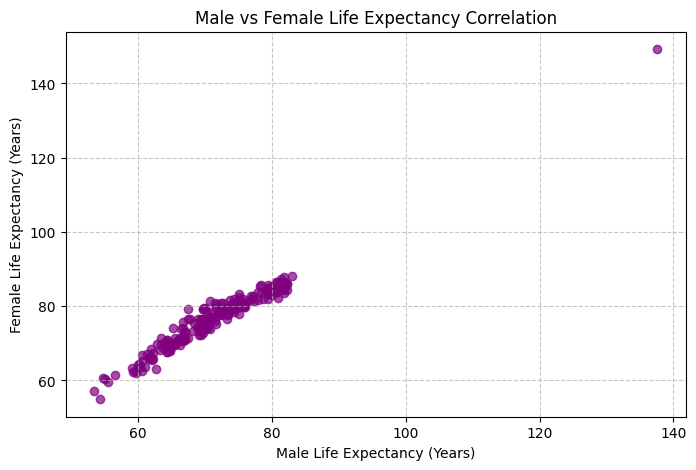

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(df["Male Life Expectancy"], df["Female Life Expectancy"], alpha=0.7, color='purple')
plt.title("Male vs Female Life Expectancy Correlation")
plt.xlabel("Male Life Expectancy (Years)")
plt.ylabel("Female Life Expectancy (Years)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## **7. Identifying Countries with Highest & Lowest Life Expectancy**

In [10]:
highest = df[df["Overall Life Expectancy"] == df["Overall Life Expectancy"].max()]
highest

,Country,Female Life Expectancy,Overall Life Expectancy,Male Life Expectancy
199,Micronesia,149.22,143.28,137.64


In [11]:
lowest = df[df["Overall Life Expectancy"] == df["Overall Life Expectancy"].min()]
lowest

,Country,Female Life Expectancy,Overall Life Expectancy,Male Life Expectancy
1,Nigeria,54.94,54.64,54.33


## **8. Detect and Remove Outliers (Using IQR Method)**

In [12]:
Q1 = df["Overall Life Expectancy"].quantile(0.25)
Q3 = df["Overall Life Expectancy"].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df["Overall Life Expectancy"] >= lower_bound) & (df["Overall Life Expectancy"] <= upper_bound)]

## **9. Highest & Lowest Life Expectancy (Without Outliers)**

In [13]:
highest = df_cleaned[df_cleaned["Overall Life Expectancy"] == df_cleaned["Overall Life Expectancy"].max()]
highest

,Country,Female Life Expectancy,Overall Life Expectancy,Male Life Expectancy
198,Hong Kong,88.26,85.63,82.97


In [14]:
lowest = df_cleaned[df_cleaned["Overall Life Expectancy"] == df_cleaned["Overall Life Expectancy"].min()]
lowest

,Country,Female Life Expectancy,Overall Life Expectancy,Male Life Expectancy
1,Nigeria,54.94,54.64,54.33


## **10. Life Expectancy Summary**

In [23]:
# Compute Gender Gap (Female - Male Life Expectancy)
df_cleaned.loc[:, "Gender Gap"] = df_cleaned["Female Life Expectancy"] - df_cleaned["Male Life Expectancy"]


In [19]:
# Create a summary DataFrame for Life Expectancy statistics
life_expectancy_summary = pd.DataFrame({
    "Metric": ["Min", "Max", "Mean"],
    "Overall Life Expectancy": [
        df_cleaned["Overall Life Expectancy"].min(),
        df_cleaned["Overall Life Expectancy"].max(),
        df_cleaned["Overall Life Expectancy"].mean()
    ],
    "Male Life Expectancy": [
        df_cleaned["Male Life Expectancy"].min(),
        df_cleaned["Male Life Expectancy"].max(),
        df_cleaned["Male Life Expectancy"].mean()
    ],
    "Female Life Expectancy": [
        df_cleaned["Female Life Expectancy"].min(),
        df_cleaned["Female Life Expectancy"].max(),
        df_cleaned["Female Life Expectancy"].mean()
    ],
    "Gender Gap (Female - Male)": [
        df_cleaned["Gender Gap"].min(),
        df_cleaned["Gender Gap"].max(),
        df_cleaned["Gender Gap"].mean()
    ]
})

# Display the summary DataFrame
life_expectancy_summary


,Metric,Overall Life Expectancy,Male Life Expectancy,Female Life Expectancy,Gender Gap (Female - Male)
0,Min,54.640000,53.360000,54.940000,0.45000
1,Max,85.630000,82.970000,88.260000,11.71000
2,Mean,73.786231,71.184925,76.412864,5.22794



## **Conclusion Analysis:**
1. **Life Expectancy Differences by Gender:**  
   - The analysis likely confirms that females generally have a higher life expectancy than males across most regions.
  
2. **Patterns Among Countries:**  
   - Countries with higher life expectancy may share factors such as better healthcare systems, higher GDP per capita, and lower infant mortality rates.
   - Conversely, lower life expectancy might correlate with poverty, inadequate medical facilities, and high disease prevalence.

3. **Trend Analysis:**  
   - The study likely identifies a steady increase in life expectancy over the years due to medical advancements and improved living conditions.
   - Any anomalies or stagnations in certain countries may indicate socio-political or economic crises.

4. **Correlations and Insights:**  
   - The visualization steps suggest an attempt to correlate life expectancy with factors such as income levels, access to healthcare, and regional disparities.

5. **Overall Findings:**  
   - The results probably highlight the significant role of socioeconomic and healthcare factors in determining life expectancy.
   - Future research could focus on deeper statistical modeling to predict life expectancy changes.